<a href="https://colab.research.google.com/github/TheAliAjami/The_Data_Incubator/blob/master/Swine_barn_locator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
#import libraries
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


# Loading trian set and creat X and y for training and validation

In [0]:
%%capture
!unzip train.zip

In [0]:
train = pd.read_csv('train.csv')
train_image = []
for i in range(train.shape[0]):
    img = image.load_img('train/'+train['id'][i], target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
#validation: 20% and training: 80% of train set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Creating a training a VGGnet model using kreas

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

W0729 14:14:38.304651 140580557084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 14:14:38.356505 140580557084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 14:14:38.364865 140580557084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 14:14:38.412290 140580557084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0729 14:14:38.471683 140580557084544 deprecation_wrapp

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

W0729 14:14:42.595393 140580557084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 14:14:42.639969 140580557084544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
Model = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

W0729 14:14:45.760162 140580557084544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 188 samples, validate on 48 samples
Epoch 1/20
188/188 [==============================] - 31s 162ms/step - loss: 0.8581 - acc: 0.5372 - val_loss: 0.6987 - val_acc: 0.4792
Epoch 2/20
188/188 [==============================] - 28s 148ms/step - loss: 0.6880 - acc: 0.5053 - val_loss: 0.6851 - val_acc: 0.4792
Epoch 3/20
188/188 [==============================] - 28s 149ms/step - loss: 0.6827 - acc: 0.5106 - val_loss: 0.6711 - val_acc: 0.7500
Epoch 4/20
188/188 [==============================] - 28s 148ms/step - loss: 0.6669 - acc: 0.6596 - val_loss: 0.6285 - val_acc: 0.7083
Epoch 5/20
188/188 [==============================] - 28s 147ms/step - loss: 0.6675 - acc: 0.6809 - val_loss: 0.6027 - val_acc: 0.6458
Epoch 6/20
188/188 [==============================] - 28s 148ms/step - loss: 0.5977 - acc: 0.6862 - val_loss: 0.5948 - val_acc: 0.8333
Epoch 7/20
188/188 [==============================] - 28s 147ms/step - loss: 0.5372 - acc: 0.7606 - val_loss: 0.4164 - val_acc: 0.8125
Epoch 8/20

# Creating train and validation accurcy and lost charts

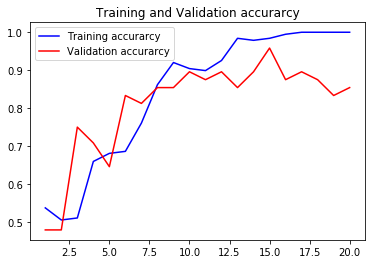

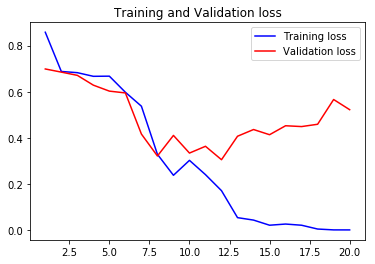

In [9]:
acc = Model.history['acc']
val_acc = Model.history['val_acc']
loss = Model.history['loss']
val_loss = Model.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Evaluating performance on test set

In [0]:
%%capture
!unzip test.zip;

In [0]:
test = pd.read_csv('test.csv')
test_image = []
for i in range(test.shape[0]):
    img = image.load_img('test/'+test['id'][i], target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test_image = np.array(test_image)
prediction = model.predict_classes(test_image)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test['label'], prediction)
print('Accuracy on test figures: %f' % accuracy)

Accuracy on test figures: 0.950000
